In [ ]:
!pip install -q transformers sentencepiece

In [ ]:
from transformers import AutoTokenizer, AutoModelForCasualLM

In [ ]:
model_name = "gpt2"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name)

# Move to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D(nf=2304, nx=768)
          (c_proj): Conv1D(nf=768, nx=768)
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D(nf=3072, nx=768)
          (c_proj): Conv1D(nf=768, nx=3072)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [ ]:
def descriptive_qa_manual(prompt, max_length=256, temperature=0.7):
    # Encode the input
    input_ids = tokenizer.encode(prompt, return_tensors="pt").to(device)

    # Generate output
    output_ids = model.generate(
        input_ids,
        max_length=max_length,
        temperature=temperature,
        do_sample=True,
        pad_token_id=tokenizer.eos_token_id,
    )

    # Decode output
    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    # Return only the answer portion
    return output_text[len(prompt):].strip()


In [ ]:
questions = {
    "Simple Prompt": "What is climate change?",
    "Descriptive Prompt": "Explain climate change in a descriptive, scientific manner for high school students.",
    "Step-by-Step Prompt": "Explain climate change step-by-step, including causes, effects, and solutions.",
    "Fun Prompt": "What are some interesting facts about climate change?",
    "Comparison Prompt": "Compare climate change and global warming."
}

responses = []

for label, q in questions.items():
    print(f"📌 {label}")
    answer = descriptive_qa_manual(q)
    responses.append([label, q, answer])
    print(answer, "\n" + "-"*80)

The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


📌 Simple Prompt
Climate change is described as a "global warming" phenomenon characterized by higher temperatures, higher rainfall and lower precipitation. The IPCC calls this phenomenon the "pause" or "pause" of the temperature increase, which it calls the "pause" of the global average temperature, which it calls the "pause" of the global mean temperature or "pause." While the IPCC reports that global average temperature is rising, it is not clear just how long the "pause" will last.

What effect will be on the U.S. economy?

The main source of U.S. economic growth is the energy sector. In 2012, the Energy Information Administration (EIA) estimated that the U.S. economy would grow by about 0.6% in 2012 due to the continued expansion of renewable energy sources by 2030. As a result, the U.S. economy is projected to grow by 3.6% in 2012 due to the continued expansion of renewable energy sources by 2030.

What will happen to the U.S. electricity system?

The U.S. electrical system has se

In [ ]:
df = pd.DataFrame(responses, columns=["Prompt Type", "Question", "Model Output"])
df

,Prompt Type,Question,Model Output
0,Simple Prompt,What is climate change?,"Climate change is described as a ""global warmi..."
1,Descriptive Prompt,"Explain climate change in a descriptive, scien...","In this course, I'll show you how to make a gr..."
2,Step-by-Step Prompt,"Explain climate change step-by-step, including...",Acknowledge and address the global warming pro...
3,Fun Prompt,What are some interesting facts about climate ...,The most obvious one is that the Earth's clima...
4,Comparison Prompt,Compare climate change and global warming.,"The paper, published in the journal Scientific..."


In [ ]:
prompts = {
    "1": "Tell me about Christ University, Bangalore",
    "2": "Which is the best University in Karnataka,India",
    "3": "Tell me your favorite breakfast recipe"
}

In [ ]:

gpt2_responses = []

for label, q in prompts.items():
    print(f"📌 {label}")
    answer = descriptive_qa_manual(q)
    gpt2_responses.append([label, q, answer])
    print(answer, "\n" + "-"*80)

📌 1
. What is your take on it?

I think it's very important to have a university in India. I think this is a great opportunity for me to come to Bangalore. Bangalore is very important for me because it's the capital of Karnataka.

I think it's very important for the people of Karnataka and also the people of Bangalore to know that when you start a university, you have to come to Bangalore and you have to be part of a society that is not just about a university but about a society of people that are like you.

I am a student of Bangalore, so I am very interested in the institutions that people are going to have to learn from and, as a result, I am very interested in the Indian students.

What is your view on the Indian students coming to Bangalore? How would you respond to them? Do you think that's a good thing?

I think that when you come to Bangalore, people will come to Bangalore, they will be coming to the universities, they will be coming to the community and they will be coming to

### ChatGPT response
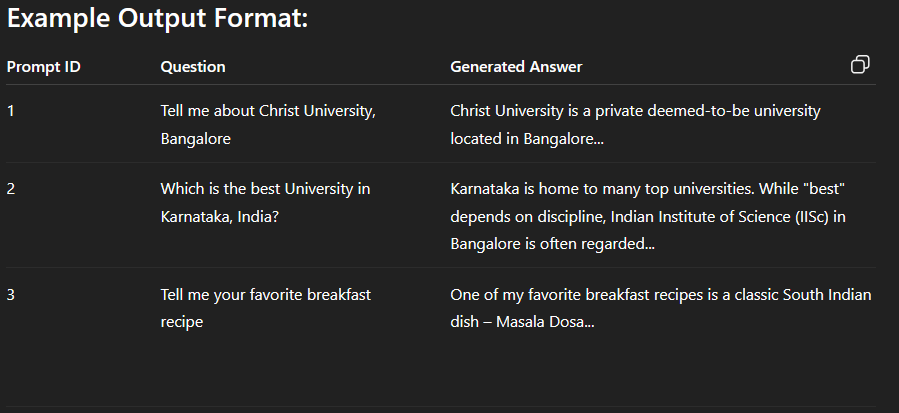

### Gemini response
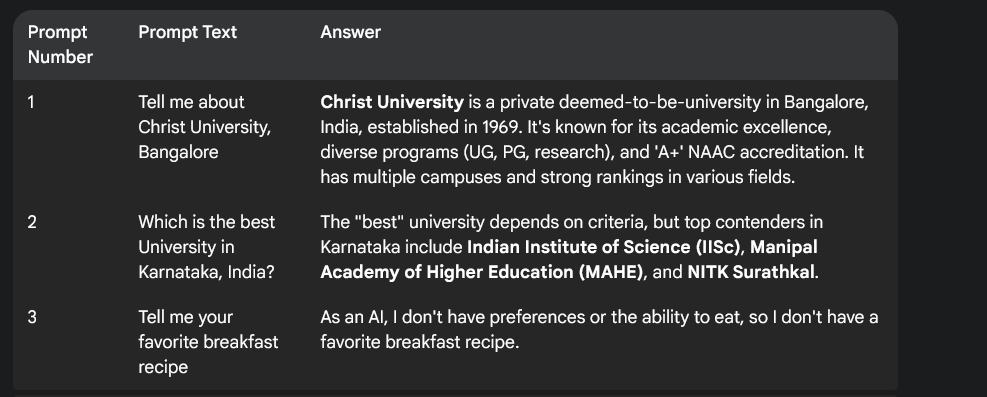